Data Types Before Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB
None

Missing Values in Each Column:
FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        26707
DEP_DELAY       26715
ARR_TIME        28244
ARR_DELAY       31884
ELAPSED_TIME    31884
DISTANCE            0
dtype: int64


/var/folders/l7/6h686jz56lv0k5xgw77mz28h0000gn/T/ipykernel_20012/3676474987.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airline_data['TAIL_NUM'].fillna(most_frequent_tail_num, inplace=True)
/var/folders/l7/6h686jz56lv0k5xgw77mz28h0000gn/T/ipykernel_20012/3676474987.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 


Data Types After Conversion:
FL_DATE         datetime64[ns]
CARRIER_CODE          category
TAIL_NUM              category
FL_NUM                   int64
ORIGIN                category
ORIGIN_ST             category
DEST                  category
DEST_ST               category
DEP_TIME               float64
DEP_DELAY              float64
ARR_TIME               float64
ARR_DELAY              float64
ELAPSED_TIME           float64
DISTANCE                 int64
dtype: object

Missing Values After Imputation:
FL_DATE         0
CARRIER_CODE    0
TAIL_NUM        0
FL_NUM          0
ORIGIN          0
ORIGIN_ST       0
DEST            0
DEST_ST         0
DEP_TIME        0
DEP_DELAY       0
ARR_TIME        0
ARR_DELAY       0
ELAPSED_TIME    0
DISTANCE        0
dtype: int64


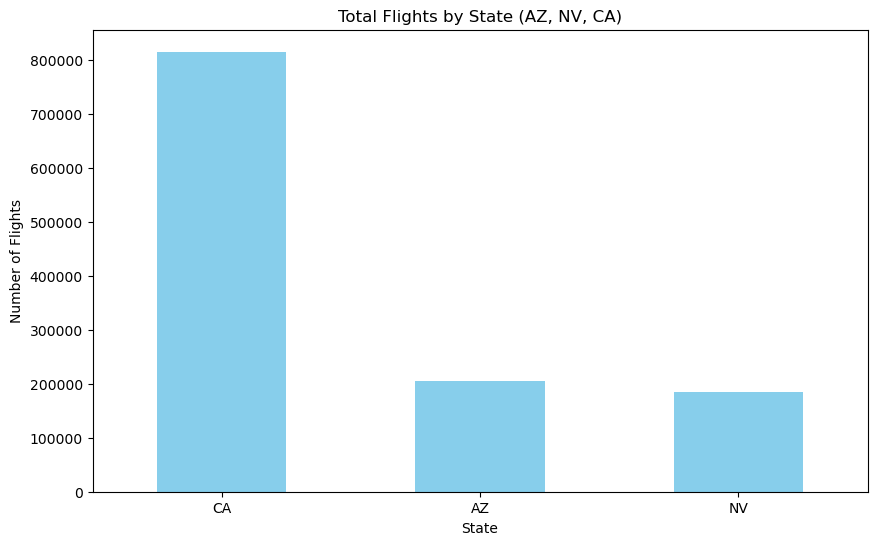

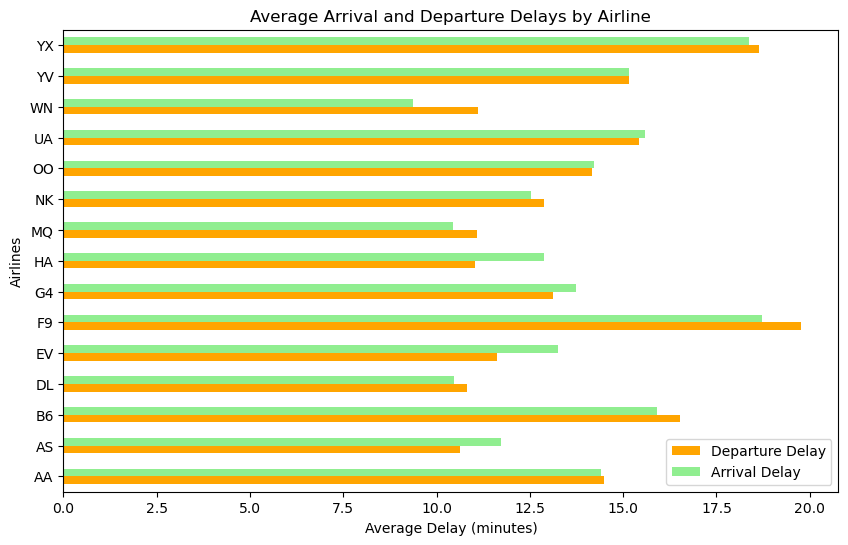

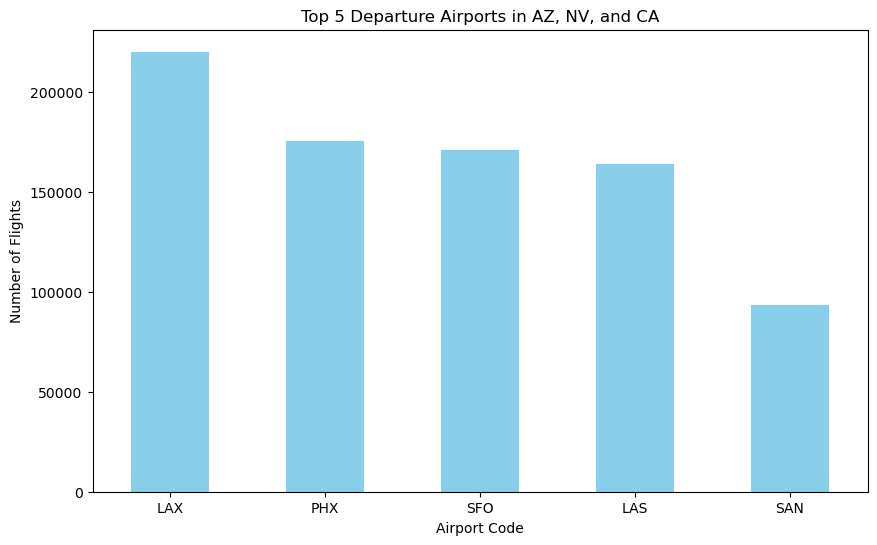

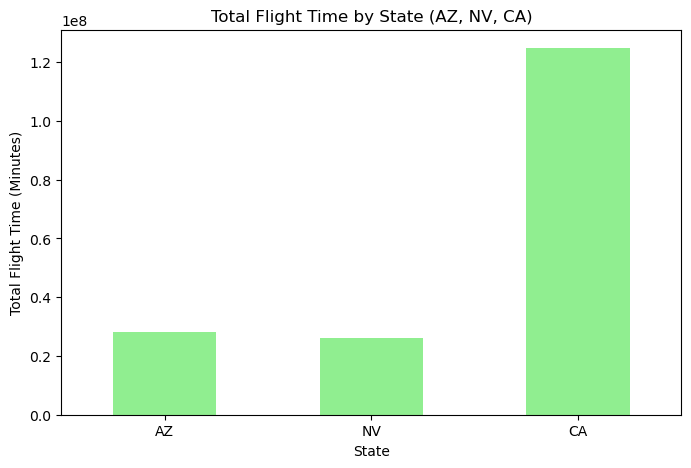

ORIGIN_ST
AZ     28290151.0
NV     26203276.0
CA    124821256.0
Name: ELAPSED_TIME, dtype: float64

The state with the most air traffic based on total flight time is CA.


In [11]:

airline_data['ELAPSED_TIME'] = airline_data['ELAPSED_TIME'].fillna(airline_data['ELAPSED_TIME'].median())

# Group by 'ORIGIN_ST' for AZ, NV, and CA and sum 'ELAPSED_TIME', passing observed=True to prevent the warning
total_flight_time_by_state = airline_data[airline_data['ORIGIN_ST'].isin(['AZ', 'NV', 'CA'])].groupby('ORIGIN_ST', observed=True)['ELAPSED_TIME'].sum()

# Ensure that only AZ, NV, and CA are graphed by reindexing
state_order = ['AZ', 'NV', 'CA']
total_flight_time_ordered = total_flight_time_by_state.reindex(state_order, fill_value=0)

# Visualize the results based on total flight time
plt.figure(figsize=(8, 5))
total_flight_time_ordered.plot(kind='bar', color='lightgreen')
plt.title('Total Flight Time by State (AZ, NV, CA) Showing Highest Air Traffic')
plt.xlabel('State')
plt.ylabel('Total Flight Time (Minutes)')
plt.xticks(rotation=0)
plt.show()

# Print the results for further insights
print(total_flight_time_ordered)
most_traffic_state_by_time = total_flight_time_ordered.idxmax()
print(f"\nThe state with the most air traffic based on total flight time is {most_traffic_state_by_time}.")




Top 5 Destinations for flights originating from AZ:
DEST
DEN    10432
LAX     9713
DFW     7888
SEA     6888
LAS     6835
Name: count, dtype: int64


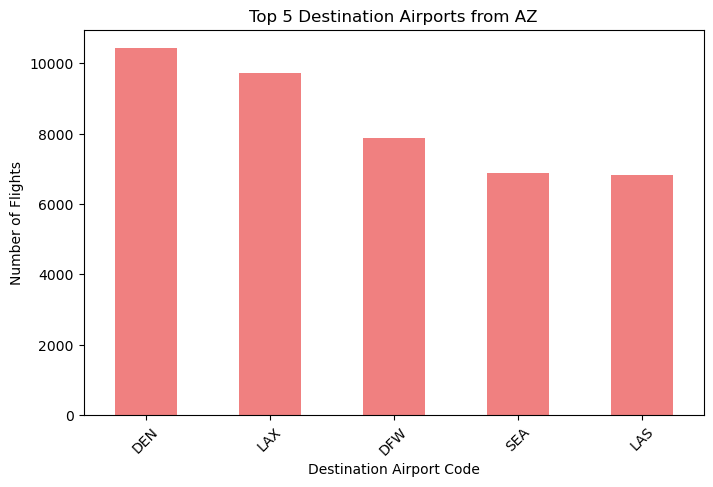


Top 5 Destinations for flights originating from NV:
DEST
LAX    13971
SFO     9425
DEN     8786
PHX     7903
SEA     7225
Name: count, dtype: int64


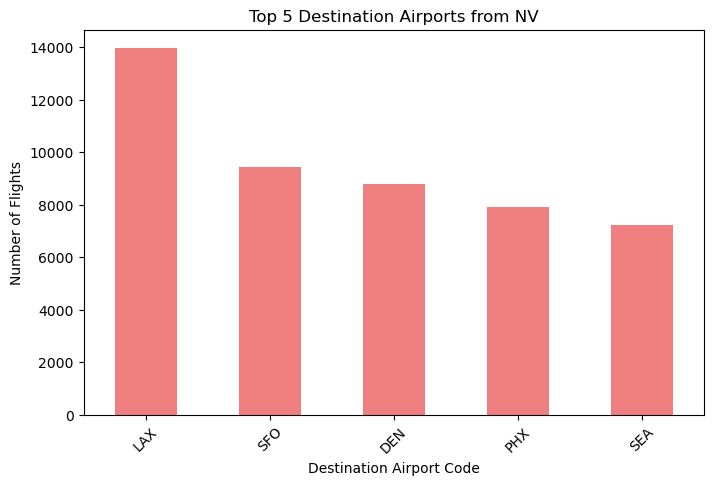


Top 5 Destinations for flights originating from CA:
DEST
PHX    49926
LAS    48972
SFO    45855
SEA    43744
LAX    41320
Name: count, dtype: int64


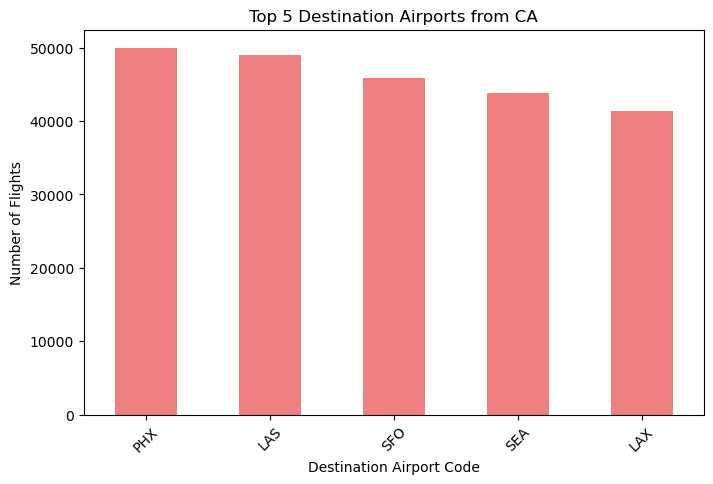


Top 10 Airlines by Proportion of Flights in AZ:
CARRIER_CODE
WN    32.064703
AA    29.736388
OO    11.641577
YV    10.664006
DL     4.701509
UA     4.160528
G4     2.873687
AS     1.710261
F9     1.344403
B6     0.512200
Name: proportion, dtype: float64


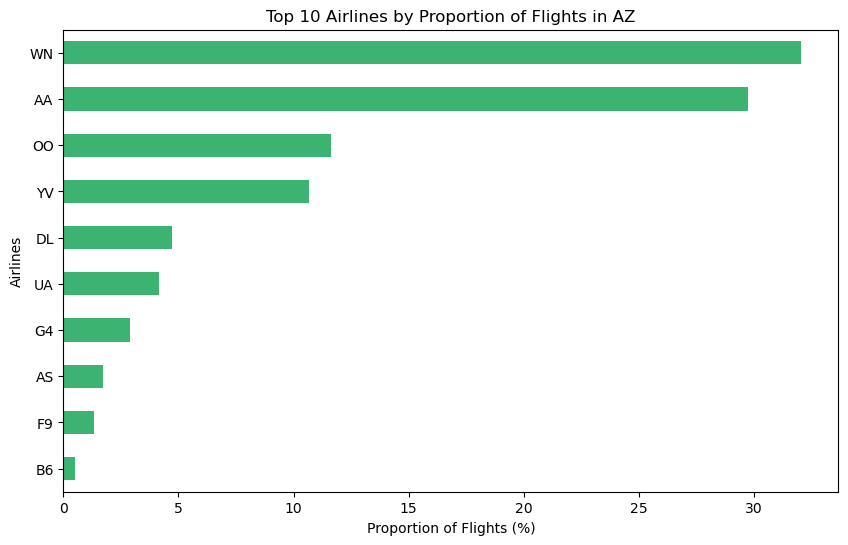


Top 10 Airlines by Proportion of Flights in NV:
CARRIER_CODE
WN    42.894033
NK     9.640641
AA     8.888684
UA     8.330536
DL     7.875248
F9     5.122403
G4     5.070432
AS     4.409424
OO     4.038047
B6     2.536299
Name: proportion, dtype: float64


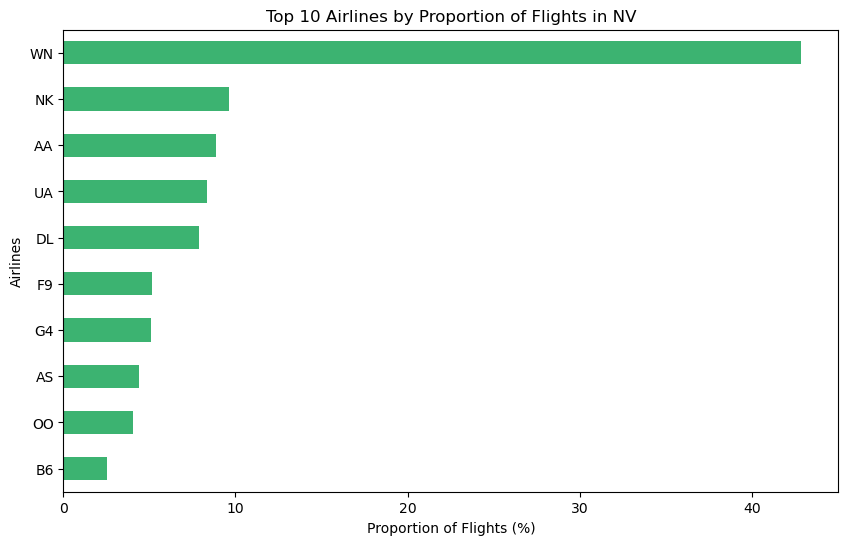


Top 10 Airlines by Proportion of Flights in CA:
CARRIER_CODE
WN    31.586240
OO    17.544038
UA    13.532542
AA    10.528337
AS     9.145520
DL     9.099868
B6     3.341809
NK     1.720545
YV     1.187078
F9     0.842110
Name: proportion, dtype: float64


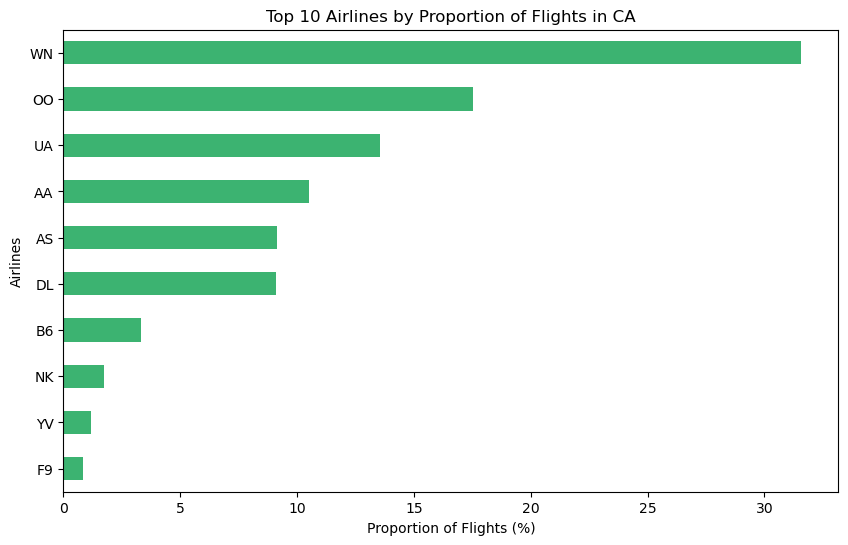

In [13]:
# Define the states of interest
states = ['AZ', 'NV', 'CA']

# For each state, calculate the proportion of flights for each airline
for state in states:
    # Filter the data for the specific state
    state_data = airline_data[airline_data['ORIGIN_ST'] == state]
    
    # Count the number of flights for each airline (CARRIER_CODE) and calculate the proportion
    airline_proportion = state_data['CARRIER_CODE'].value_counts(normalize=True).head(10)
    
    # Convert proportion to percentage
    airline_proportion = airline_proportion * 100

    # Print the top 10 airlines by proportion for each state
    print(f"\nTop 10 Airlines by Proportion of Flights in {state}:")
    print(airline_proportion)
    
    # Visualize the top 10 airlines by proportion for each state
    plt.figure(figsize=(10, 6))
    airline_proportion.plot(kind='barh', color='mediumseagreen')
    plt.title(f'Top 10 Airlines by Proportion of Flights in {state}')
    plt.xlabel('Proportion of Flights (%)')
    plt.ylabel('Airlines')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest proportion on top
    plt.show()
